
Scratch directory: /tmp/

  //>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>//
  // ManyBody Setup: N-Body Levels [1, 2]//
  //<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<//

        Number of 1-body computations:     2
        Number of 2-body computations:     1

    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.7a1.dev44 

                         Git: Rev {master} 2792bff 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. 

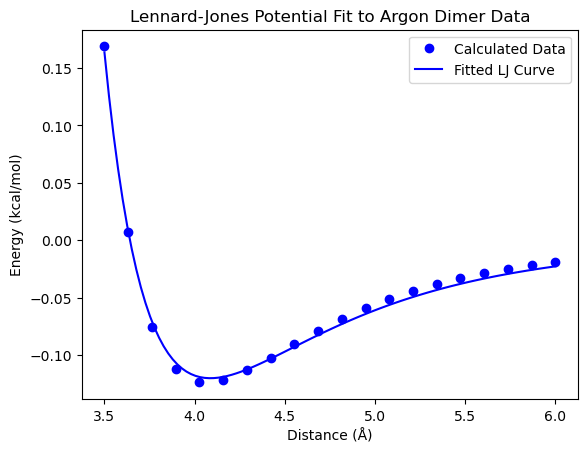

In [1]:
# Import necessary libraries
import psi4  # Quantum chemistry library for molecular calculations
import numpy as np  # Library for numerical operations
import matplotlib.pyplot as plt  # Library for plotting
from scipy.optimize import curve_fit  # Library for fitting data to a function

# Define the Lennard-Jones potential function
def lj(r, sigma, eps):
    return 4 * eps * ((sigma / r)**12 - (sigma / r)**6)

# Define the geometry of the Argon dimer, with a placeholder for the distance between atoms
ar2_geometry = """
Ar
--
Ar 1 {0}
"""

# Generate an array of distances (R values) between 3.5 and 6.0 Å for energy calculations
Rvals = np.linspace(3.5, 6.0, 20)

# Set Psi4 options to freeze core orbitals, which can speed up calculations
psi4.set_options({'freeze_core': True})

# Dictionary to store calculated energies at each distance R
ecp = {}

# Loop through each R value, calculate energy, and store it in ecp
for R in Rvals:
    ar2 = psi4.geometry(ar2_geometry.format(R))  # Create geometry for each R
    # Calculate interaction energy using the specified method, including BSSE correction
    ecp[R] = psi4.energy('ccsd(t)/aug-cc-pvdz', bsse_type='cp', molecule=ar2)

# Convert distances and energies to arrays for fitting and plotting
R_data = np.array(Rvals)
# Convert energies from Hartree to kcal/mol using Psi4's constant
E_data = np.array([ecp[R] * psi4.constants.hartree2kcalmol for R in Rvals])

# Fit the calculated energies to the Lennard-Jones potential using curve fitting
# Initial guesses for sigma and epsilon are 3.0 and 1.0, respectively
popt, pcov = curve_fit(lj, R_data, E_data, p0=[3.0, 1.0])

# Extract the optimized sigma and epsilon values from the fitting parameters
sigma_fit, eps_fit = popt

# Print the fitted parameters
print(f"Fitted sigma: {sigma_fit:.3f} Å")
print(f"Fitted epsilon: {eps_fit:.3f} kcal/mol")

# Plot the original data and the fitted Lennard-Jones potential curve
R_fine = np.linspace(min(R_data), max(R_data), 100)  # Generate a finer range for smooth plotting
E_fitted = lj(R_fine, *popt)  # Calculate the fitted Lennard-Jones potential over the fine R range

# Plotting the data
plt.figure()
plt.plot(R_data, E_data, 'bo', label='Calculated Data')  # Plot calculated energies as blue dots
plt.plot(R_fine, E_fitted, 'b-', label='Fitted LJ Curve')  # Plot fitted LJ curve as a black line
plt.xlabel('Distance (Å)')
plt.ylabel('Energy (kcal/mol)')
plt.legend()
plt.title('Lennard-Jones Potential Fit to Argon Dimer Data')
plt.savefig("/home/yl12451/comp-lab-class/comp-lab-class-2024/Week10-IntroElectronicStructure/Figures/ar2.png")
plt.show()
